<a href="https://colab.research.google.com/github/koroshMohanaee/DeepLearning/blob/main/ConvolutionalNeuralNetworkMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras import models
from keras .models import Sequential
from keras import layers
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


4


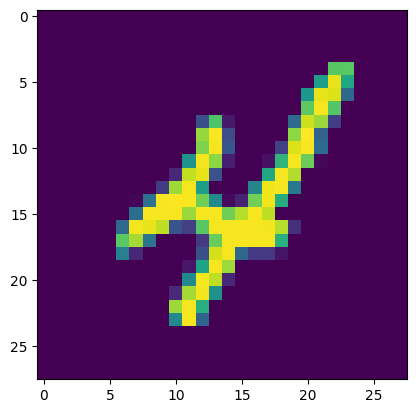

In [6]:
plt.imshow(x_train[9])
print(y_train[9])

## normalization X and Y

In [7]:
# Preprocess input data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## model architecture

In [8]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile model

In [9]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model on training data


In [10]:
#Fit model on training data
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_split=0.2)

Epoch 1/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6295 - loss: 1.1222 - val_accuracy: 0.9682 - val_loss: 0.1050
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9435 - loss: 0.1928 - val_accuracy: 0.9797 - val_loss: 0.0730
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9621 - loss: 0.1329 - val_accuracy: 0.9818 - val_loss: 0.0637
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9695 - loss: 0.1052 - val_accuracy: 0.9852 - val_loss: 0.0545
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9754 - loss: 0.0822 - val_accuracy: 0.9843 - val_loss: 0.0560
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9780 - loss: 0.0740 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9878 - val_loss: 0.0464
Epoch 8/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9854 - loss: 0.0543 - val_ac

## evalute

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print('Testing loss:',loss )
print('accuracy:',acc )

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9906 - loss: 0.1024
Testing loss: 0.0851810872554779
accuracy: 0.9926000237464905


## visualization

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


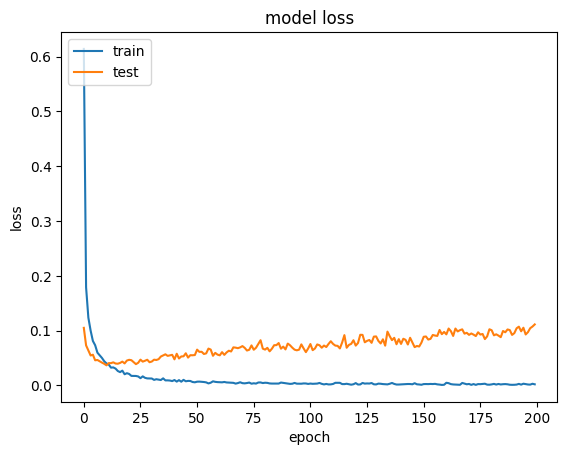

In [11]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

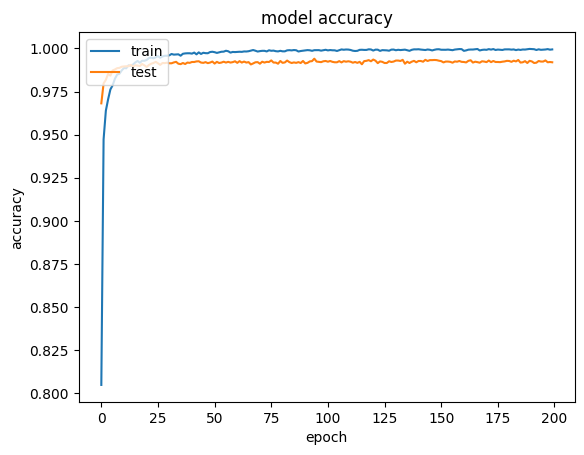

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()